# 2. Preparação dos dados para a rede

In [1]:
%load_ext autoreload
%autoreload 2

%matplotlib inline
import os
import matplotlib.pyplot as plt
import numpy as np
import h5py
import keras
from imblearn.over_sampling import ADASYN

import src

Using TensorFlow backend.
c:\users\arthur\anaconda3\envs\tcc\lib\site-packages\sklearn\externals\six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)


In [2]:
with h5py.File('../data/interim/stanford6_truncated_rgb.h5', 'r') as dataset:
    x_train_original = np.array(dataset['train/X'])
    y_train_original = np.array(dataset['train/Y'])
    x_test_original = np.array(dataset['test/X'])
    y_test_original = np.array(dataset['test/Y'])
    
classnames = {
    0: 'Floodplain',
    1: 'Pointbar',
    2: 'Channel',
    3: 'Boundary',
}        

m = x_train_original.shape[0]
num_classes = 4

c:\users\arthur\anaconda3\envs\tcc\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


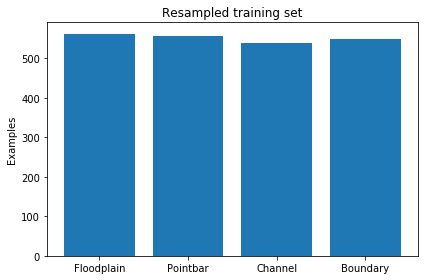

In [3]:
resampler = ADASYN()

x_train_resampled, y_train_resampled = resampler.fit_resample(
    np.reshape(x_train_original, (m, np.product(x_train_original.shape[1:]))), 
    y_train_original
)
x_train_resampled = np.reshape(
    x_train_resampled, 
    (x_train_resampled.shape[0], *x_train_original.shape[1:])
)

src.plot_classes_freq(
    src.class_frequency(y_train_resampled, num_classes),
    classnames.values(),
    title='Resampled training set'
)

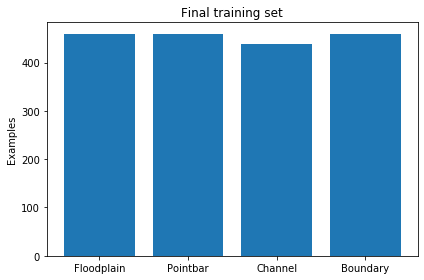

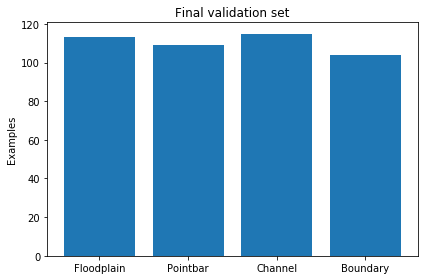

In [4]:
np.random.seed(42)

m = x_train_resampled.shape[0]
idx = np.random.choice(m, int(m * 0.2))
mask = np.ones(m, dtype=bool)
mask[idx] = False

x_train_split, x_val_split = x_train_resampled[mask], x_train_resampled[idx]
y_train_split, y_val_split = y_train_resampled[mask], y_train_resampled[idx]


src.plot_classes_freq(
    src.class_frequency(y_train_split, num_classes),
    classnames.values(),
    title='Final training set'
)

src.plot_classes_freq(
    src.class_frequency(y_val_split, num_classes),
    classnames.values(),
    title='Final validation set'
)

In [5]:
x_train = x_train_split.astype('float16') / 255
y_train = keras.utils.to_categorical(y_train_split, num_classes)

x_val = x_val_split.astype('float16') / 255
y_val= keras.utils.to_categorical(y_val_split, num_classes)

x_test = x_test_original.astype('float16') / 255
y_test = keras.utils.to_categorical(y_test_original, num_classes)

In [6]:
filename = '../data/processed/stanford6_truncated_rgb.h5'

with h5py.File(filename, 'w') as file:
    file.create_dataset('test/X', data=x_test)
    file.create_dataset('test/Y', data=y_test)
    
    file.create_dataset('val/X', data=x_val)
    file.create_dataset('val/Y', data=y_val)
    
    file.create_dataset('train/X', data=x_train)
    file.create_dataset('train/Y', data=y_train)


[**3. CNN Training**](03-cnn-training.ipynb)